In [1]:
import pandas as pd
import math
import seaborn as sns
import numpy as np

In [2]:
movements = pd.read_csv("../data/data_movements_demo.csv")
records = pd.read_csv("../data/data_trials_demo.csv")

<Axes: xlabel='x', ylabel='y'>

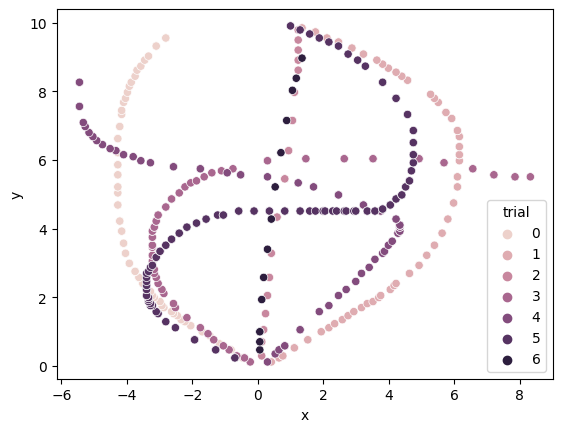

In [3]:
sns.scatterplot(data = movements.loc[movements.state == 'reach'], x = 'x', y = 'y', hue = 'trial')

In [4]:
movements

,Unnamed: 0,trial,state,sample,time,x,y
0,0,0,search_ring,0,0.005326,-20.507812,-20.507812
1,1,0,search_ring,1,0.008063,-20.507812,-20.507812
2,2,0,search_ring,2,0.017854,-20.507812,-20.507812
3,3,0,search_ring,3,0.019127,-20.507812,-20.507812
4,4,0,search_ring,4,0.034628,-20.507812,-20.507812
...,...,...,...,...,...,...,...
6255,1260,6,iti,6897,59.280242,2.753906,16.875000
6256,1261,6,iti,6898,59.294257,2.753906,16.875000
6257,1262,6,iti,6899,59.302776,2.753906,16.875000
6258,1263,6,iti,6900,59.306004,2.753906,16.875000


In [5]:
dist = lambda x1, y1, x2, y2: math.sqrt((y2 - y1)**2 + (x2 - x1)**2)

dx = [0]
dt = [0]
for i in range(1, len(movements)):
    prev_row = movements.iloc[i - 1]
    cur_row = movements.iloc[i]
    dx.append(dist(prev_row.x, prev_row.y, cur_row.x, cur_row.y))
    dt.append(cur_row.time - prev_row.time)

movements['dx'] = dx
movements['dt'] = dt

In [6]:
movements['vel'] = movements.dx / movements.dt

In [7]:
reach = movements.loc[movements.state == 'reach']
max_vel = reach[['trial', 'dx', 'dt', 'vel']].groupby('trial').agg({'vel': 'max'}).reset_index().rename(columns={'vel': 'max_vel'})

joined = pd.merge(reach, max_vel, on='trial', how='left')
mx_points = joined.loc[joined.vel == joined.max_vel]
first_points = reach.groupby('trial').agg(lambda x: list(x)[0]).reset_index()

In [8]:
mx_points

,Unnamed: 0,trial,state,sample,time,x,y,dx,dt,vel,max_vel
19,620,0,reach,620,5.380779,-2.871094,1.699219,0.262039,0.002950,88.813064,88.813064
93,664,1,reach,1573,13.589147,4.042969,2.226562,0.341657,0.002752,124.131827,124.131827
173,395,2,reach,2264,19.455724,1.230469,8.906250,0.292969,0.002817,103.984873,103.984873
222,696,3,reach,3839,33.113199,-0.761719,5.742188,0.356412,0.002400,148.523015,148.523015
293,610,4,reach,4710,40.530347,-4.101562,6.152344,0.298771,0.002641,113.149280,113.149280
408,431,5,reach,5395,46.447041,2.460938,9.316406,0.375183,0.002609,143.821753,143.821753
423,1023,6,reach,6660,57.263833,0.703125,6.210938,1.011485,0.002650,381.662333,381.662333


In [9]:
first_points

,trial,Unnamed: 0,state,sample,time,x,y,dx,dt,vel
0,0,601,reach,601,5.223372,-0.234375,0.117188,0.131020,0.017983,7.285815
1,1,644,reach,1553,13.428914,0.410156,0.117188,0.211263,0.014037,15.050198
2,2,371,reach,2240,19.256404,0.117188,0.292969,0.234375,0.003745,62.589027
3,3,651,reach,3794,32.712398,-0.234375,0.117188,0.175781,0.015296,11.492163
4,4,559,reach,4659,40.097194,0.292969,0.117188,0.165728,0.015767,10.511132
5,5,329,reach,5293,45.570968,-0.703125,0.234375,0.555869,0.016586,33.515199
6,6,1014,reach,6651,57.195446,0.058594,0.468750,0.234375,0.013194,17.763251


<Axes: xlabel='x', ylabel='y'>

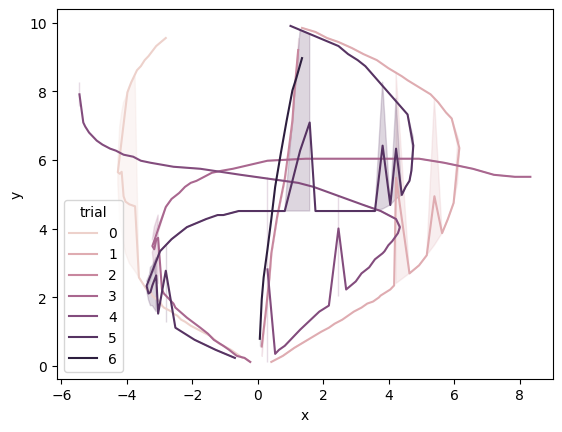

In [10]:
sns.lineplot(data = movements.loc[movements.state == 'reach'], x = 'x', y = 'y', hue = 'trial', sort = False)

In [11]:
movements = pd.read_csv('../data/data_movements_7.csv')
trials = pd.read_csv('../data/data_trials_7.csv')
trials['trial'] = trials.trial - 1

In [12]:
uncertainty_cols = ['no_uncertainty', 'low_uncertainty', 'high_uncertainty', 'unlimited_uncertainty']
def uncertainty_label(x):
    if all(x[col] == 0 for col in uncertainty_cols):
        return 'w/b'
    for col in uncertainty_cols:
        if x[col] == 1:
            return col

trials['uncertainty'] = trials.apply(uncertainty_label, axis=1)

<Axes: xlabel='x', ylabel='y'>

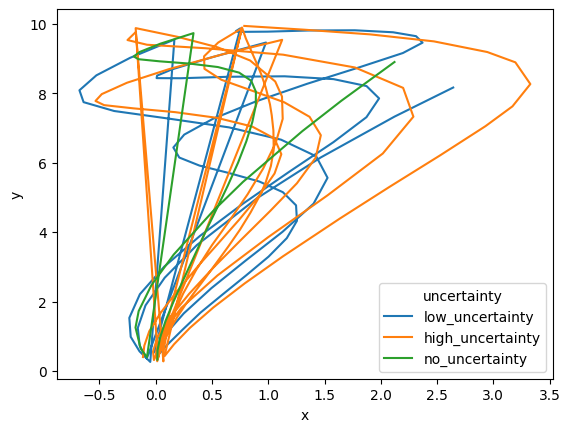

In [13]:
joined = pd.merge(movements, trials[['trial', 'uncertainty']], on='trial', how='left')

rand_trials = np.random.choice([i for i in range(110, 180)], 20)

# smpl = joined.loc[(joined.state == 'reach') & (joined.trial.isin(rand_trials))]

smpl = joined.loc[(joined.state == 'reach') & (joined.trial.isin(rand_trials) & (joined.uncertainty.isin(['low_uncertainty', 'high_uncertainty', 'no_uncertainty'])))]

sns.lineplot(data = smpl.loc[smpl.state == 'reach'], x = 'x', y = 'y', hue = 'uncertainty', sort = False)
